### Which UCLs consistently meet or fail to meet the 85% or 90% response time targets for Code 1 incidents?

In [102]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [104]:
# Load the provided CSV files

census_2018 = Path("Data/censusdata2018.csv")
ambulance_2018 = Path("Data/ambulance2018.csv")
ambulance_2019 = Path("Data/ambulance2019.csv")

In [106]:
census_data_2018 = pd.read_csv(census_2018)
ambulance_data_2018 = pd.read_csv(ambulance_2018)
ambulance_data_2019 = pd.read_csv(ambulance_2019)

In [108]:
# Cleaning and formatting the 'ambulance_data_2018' and 'ambulance_data_2019' datasets for analysis

# Removing '%' and converting the 'percentage <= 15 minutes' columns to numeric for comparison

ambulance_data_2018['%<=15mins'] = ambulance_data_2018['%<=15mins'].str.replace('%', '').astype(float)
ambulance_data_2019['%<=15mins'] = ambulance_data_2019['%<=15mins'].str.replace('%', '').astype(float)

# Combining the 2018 and 2019 data for easier analysis

combined_data = pd.concat([ambulance_data_2018[['UCL Name', '%<=15mins']],
                           ambulance_data_2019[['UCL Name', '%<=15mins']]], 
                          keys=['2018', '2019'], names=['Year']).reset_index()
combined_data.head()


,Year,level_1,UCL Name,%<=15mins
0,2018,0,Albury - Wodonga (Wodonga Part),91.35
1,2018,1,Bacchus Marsh,79.85
2,2018,2,Bairnsdale,85.61
3,2018,3,Ballarat,89.32
4,2018,4,Benalla,84.08


In [110]:
# Calculating the mean response time performance across the two years

mean_performance = combined_data.groupby('UCL Name')['%<=15mins'].mean().reset_index()
mean_performance.head(10)


,UCL Name,%<=15mins
0,Albury - Wodonga (Wodonga Part),91.125
1,Bacchus Marsh,81.625
2,Bairnsdale,84.855
3,Ballarat,90.260
4,Benalla,80.240
5,Bendigo,86.825
6,Castlemaine,72.215
7,Colac,85.785
8,Drouin,79.950
9,Drysdale - Clifton Springs,83.540


In [112]:
# Identifying UCLs that meet or fail the 85% and 90% targets
mean_performance['Performance'] = mean_performance['%<=15mins'].apply(
    lambda x: 'Meet 90% Target' if x >= 90 else ('Fail 85% Target' if x < 85 else 'Between 85%-90%')
)

# Counting the number of UCLs that meet the 90%, fail the 85%, or fall in between

performance_counts = mean_performance['Performance'].value_counts()

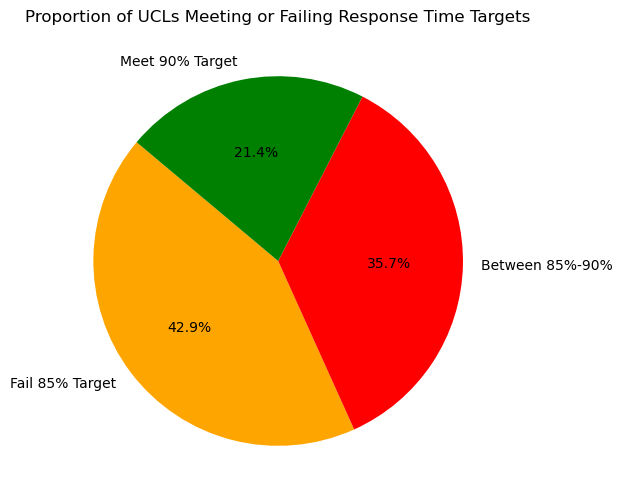

In [114]:
# Pie chart visualization

plt.figure(figsize=(8, 6))
plt.pie(performance_counts, labels=performance_counts.index, autopct='%1.1f%%', startangle=140, colors=['orange', 'red', 'green'])
plt.title('Proportion of UCLs Meeting or Failing Response Time Targets')
plt.show()

In [128]:
# Displaying the first few rows of the performance table for review
mean_performance.head()

,UCL Name,%<=15mins,Performance
0,Albury - Wodonga (Wodonga Part),91.125,Meet 90% Target
1,Bacchus Marsh,81.625,Fail 85% Target
2,Bairnsdale,84.855,Fail 85% Target
3,Ballarat,90.260,Meet 90% Target
4,Benalla,80.240,Fail 85% Target
